In [1]:
import pandas as pd
import tensorflow as tf
from tensorflow.keras import layers, models
import numpy as np
import matplotlib.pyplot as plt


In [2]:
data_ss_train_df = pd.read_csv('data_smin_ss_train_csv')
data_ss_test_df = pd.read_csv('data_ss_test_csv')
data_ss_val_df = pd.read_csv('data_ss_val_csv')

In [3]:
#own module which takes in df for train, test and val and returns in x and y format.  Can also sample.
from data_formatting import data_format

In [4]:
X_ss_train, X_ss_test, X_ss_val, y_ss_train, y_ss_test, y_ss_val = data_format(data_ss_train_df, data_ss_test_df, data_ss_val_df, None, None)

In [5]:
X_ss_train_sample, X_ss_test_sample, X_ss_val_sample, y_ss_train_sample, y_ss_test_sample, y_ss_val_sample = data_format(data_ss_train_df, data_ss_test_df, data_ss_val_df, 'sample', 20)

In [6]:
y_ss_train.dtype

dtype('int64')

In [7]:
sdfasdf

NameError: name 'sdfasdf' is not defined

Neural Network

In [ ]:
# Define the model
model = models.Sequential()

X_train_dim = X_ss_train.shape[1]

# Add input layer and hidden layers
model.add(layers.Dense(64, activation='relu', input_dim=X_train_dim))
model.add(layers.Dense(32, activation='relu'))

# Add output layer with softmax activation for multi-class classification
model.add(layers.Dense(3, activation='softmax'))

# Compile the model
model.compile(optimizer='adam', 
              loss='sparse_categorical_crossentropy',  # Use categorical crossentropy for multi-class classification
              metrics=['accuracy'])
#https://datascience.stackexchange.com/questions/41921/sparse-categorical-crossentropy-vs-categorical-crossentropy-keras-accuracy#:~:text=Mathematically%20there%20is%20no%20difference,000%20samples)%20show%20no%20difference.

# Display the model summary
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 64)                576       
                                                                 
 dense_1 (Dense)             (None, 32)                2080      
                                                                 
 dense_2 (Dense)             (None, 3)                 99        
                                                                 
Total params: 2755 (10.76 KB)
Trainable params: 2755 (10.76 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [ ]:
# Train the model
history = model.fit(X_ss_train, y_ss_train, epochs=30, batch_size=32, validation_data=(X_ss_val, y_ss_val))

# Evaluate the model on the test set
test_loss, test_acc = model.evaluate(X_ss_test, y_ss_test)
print(f'Test accuracy: {test_acc}')

# You can use the model for predictions
predictions = model.predict(X_ss_test)

Epoch 1/30
9002/9002 [==============================] - 10s 1ms/step - loss: 0.5237 - accuracy: 0.7746 - val_loss: 0.5680 - val_accuracy: 0.7281
Epoch 2/30
9002/9002 [==============================] - 9s 1ms/step - loss: 0.4002 - accuracy: 0.8185 - val_loss: 0.5283 - val_accuracy: 0.7458
Epoch 3/30
9002/9002 [==============================] - 9s 1ms/step - loss: 0.3771 - accuracy: 0.8273 - val_loss: 0.5314 - val_accuracy: 0.7515
Epoch 4/30
9002/9002 [==============================] - 25s 3ms/step - loss: 0.3635 - accuracy: 0.8332 - val_loss: 0.5024 - val_accuracy: 0.7626
Epoch 5/30
9002/9002 [==============================] - 10s 1ms/step - loss: 0.3542 - accuracy: 0.8384 - val_loss: 0.4871 - val_accuracy: 0.7701
Epoch 6/30
9002/9002 [==============================] - 10s 1ms/step - loss: 0.3464 - accuracy: 0.8414 - val_loss: 0.5185 - val_accuracy: 0.7593
Epoch 7/30
9002/9002 [==============================] - 25s 3ms/step - loss: 0.3405 - accuracy: 0.8444 - val_loss: 0.4949 - val_accu

KeyboardInterrupt: 

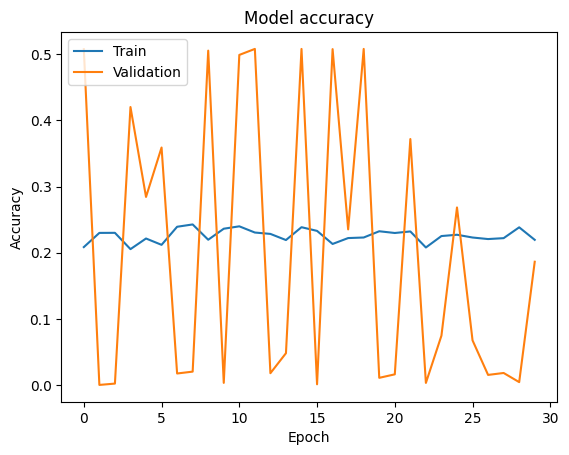

In [ ]:
# Plot training & validation accuracy values
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend(['Train', 'Validation'], loc='upper left')
plt.show()


https://machinelearningmastery.com/learning-rate-for-deep-learning-neural-networks/#:~:text=in%20general%2C%20it%20is%20not,greater%20than%2010%5E%2D6.

https://machinelearningmastery.com/tutorial-first-neural-network-python-keras/

NEW ATTEMPT

In [ ]:
asdfsf

NameError: name 'asdfsf' is not defined

In [13]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout
from tensorflow.keras.callbacks import EarlyStopping
#from tensorflow.keras.callbacks import ModelCheckpoint

#Weights still assigned randomly but in a reproducible way
np.random.seed(7)
tf.random.set_seed(7)

def create_model(hidden_layers, neurons, dropout_rate, learning_rate):
    model = Sequential()
    model.add(Dense(neurons, input_dim=input_dim, activation='relu'))
    model.add(Dropout(dropout_rate))
    
    for _ in range(hidden_layers - 1):
        model.add(Dense(neurons, activation='relu'))
        model.add(Dropout(dropout_rate))
    
    model.add(Dense(3, activation='softmax'))  #3 classes and therefore cannot use Sigmoid
    optimizer = tf.keras.optimizers.Adam(learning_rate=learning_rate)
    model.compile(optimizer=optimizer, loss='sparse_categorical_crossentropy', metrics=['accuracy'])
    return model

# Shape of input is same as my independent variables in training set
input_dim = X_ss_train.shape[1]

# Define hyperparameter search space
param_grid = {
    #Didn't include 0 as that would mean the data was linearly separable
    'hidden_layers': [1, 2, 3],
    #'neurons': [64, 128, 256],
    'neurons': [50, 100, 150, 200, 250, 300],
    #'dropout_rate': [0.5, 0.8],
    'dropout_rate': [0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9],
    'learning_rate': [0.0001, 0.001, 0.01, 0.1]
    }

#648

# Track the best model and its performance
best_model = None
best_epochs = float('inf')
best_accuracy = 0.0

# Iterate over hyperparameter combinations
for hidden_layers in param_grid['hidden_layers']:
    for neurons in param_grid['neurons']:
        for dropout_rate in param_grid['dropout_rate']:
            for learning_rate in param_grid['learning_rate']:
                print(f"Training model with {hidden_layers} hidden layers, {neurons} neurons, "
                      f"{dropout_rate} dropout, and {learning_rate} learning rate.")
                
                # Create the model
                model = create_model(hidden_layers, neurons, dropout_rate, learning_rate)
                
                # Set up early stopping
                early_stopping = EarlyStopping(monitor='val_loss', patience=5, restore_best_weights=True)

                #If I decide to use ModelCheckpoint instead
                #early_stopping = EarlyStopping(monitor='val_loss', patience=5, restore_best_weights=False)
                #checkpoint = ModelCheckpoint(model_file, monitor="val_loss", mode="min", save_best_only=True, verbose=1)

                #history = model.fit(X_ss_train, y_ss_train, epochs=200, batch_size=32, validation_data=(X_ss_val, y_ss_val), callbacks=[early_stopping, checkpoint])
                
                # Train the model
                history = model.fit(X_ss_train_sample, y_ss_train_sample, epochs=200, batch_size=32,
                                    validation_data=(X_ss_val_sample, y_ss_val_sample), callbacks=[early_stopping])
                

                
                # Get the number of epochs it took for early stopping
                epochs = len(history.history['loss'])
                print(f"Early stopped after {epochs} epochs.")

                # Plot learning curves for the current hyperparameter combination
                label = f"{hidden_layers} ls, {neurons} ns, drop={dropout_rate}, lr={learning_rate}"
                plt.plot(np.arange(1, epochs + 1), history.history['loss'], label=f'Train_Loss ({label})')
                plt.plot(np.arange(1, epochs + 1), history.history['val_loss'], label=f'Val_Loss ({label})')

                
                # Evaluate on validation set
                _, accuracy = model.evaluate(X_ss_val_sample, y_ss_val_sample)
                print(f"Validation accuracy: {accuracy}\n")
                
                # Check if this model is the best so far
                if accuracy > best_accuracy:
                    best_accuracy = accuracy
                    best_model = model
                    best_epochs = epochs
                    best_hidden_layers = hidden_layers
                    best_neurons = neurons
                    best_dropout_rate = dropout_rate
                    best_learning_rate = learning_rate

#If using above method
#model.load_weights(model_file)


plt.title('Learning Curves for Different Hyperparameter Combinations')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.figure(figsize=(11.69,8.27))
plt.show()

print(f"Best model achieved {best_accuracy} accuracy on the validation set after {best_epochs} epochs, {best_hidden_layers} layers, {best_neurons} neurons, {best_dropout_rate} dropout rate and {best_learning_rate} learning rate")


Training model with 1 hidden layers, 50 neurons, 0.1 dropout, and 0.0001 learning rate.
Epoch 1/200
451/451 [==============================] - 1s 1ms/step - loss: 1.1286 - accuracy: 0.4090 - val_loss: 0.9218 - val_accuracy: 0.5892
Epoch 2/200
451/451 [==============================] - 0s 1ms/step - loss: 1.0185 - accuracy: 0.4709 - val_loss: 0.9535 - val_accuracy: 0.5640
Epoch 3/200
451/451 [==============================] - 1s 1ms/step - loss: 0.9873 - accuracy: 0.5066 - val_loss: 0.9508 - val_accuracy: 0.5662
Epoch 4/200
451/451 [==============================] - 0s 1ms/step - loss: 0.9710 - accuracy: 0.5177 - val_loss: 0.9499 - val_accuracy: 0.5640
Epoch 5/200
451/451 [==============================] - 1s 1ms/step - loss: 0.9593 - accuracy: 0.5297 - val_loss: 0.9355 - val_accuracy: 0.5866
Epoch 6/200
451/451 [==============================] - 0s 1ms/step - loss: 0.9509 - accuracy: 0.5336 - val_loss: 0.9351 - val_accuracy: 0.5851
Early stopped after 6 epochs.


NameError: name 'plt' is not defined

In [12]:
y_ss_val_sample.shape

(2702,)

In [ ]:
test_loss, test_acc = best_model.evaluate(X_ss_test, y_ss_test)
print(f'Test accuracy: {test_acc}')

845/845 [==============================] - 1s 1ms/step - loss: 0.9080 - accuracy: 0.6900
Test accuracy: 0.6900303363800049


No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


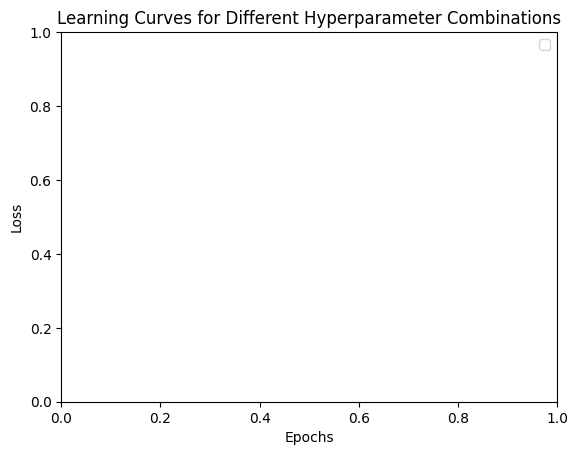

<Figure size 50000x50000 with 0 Axes>

In [ ]:
plt.title('Learning Curves for Different Hyperparameter Combinations')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.figure(figsize=(500,500))
plt.show()


Best model - Training model with 3 hidden layers, 256 neurons, 0.2 dropout, and 0.0001 learning rate.  Try with more hidden layers/ more neurons?

Test accuracy: 0.9357560276985168


#found a better one with lesser learning rate but epochs 200 so that it could early stop after 100.  Same dropout, neurons and hidden layers.